Información del DataFrame (sin columnas ignoradas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   gidenpac                       893 non-null    object  
 1   itipsexo                       893 non-null    category
 2   gsitalta                       893 non-null    category
 3   iotrocen                       893 non-null    category
 4   gdiagalt                       893 non-null    category
 5   ds_izq_der                     893 non-null    category
 6   ds_turno                       893 non-null    category
 7   ds_edad                        893 non-null    int64   
 8   ds_estancia                    893 non-null    int64   
 9   ds_pre_oper                    893 non-null    int64   
 10  ds_post_oper                   893 non-null    int64   
 11  ds_vivo_alta                   893 non-null  

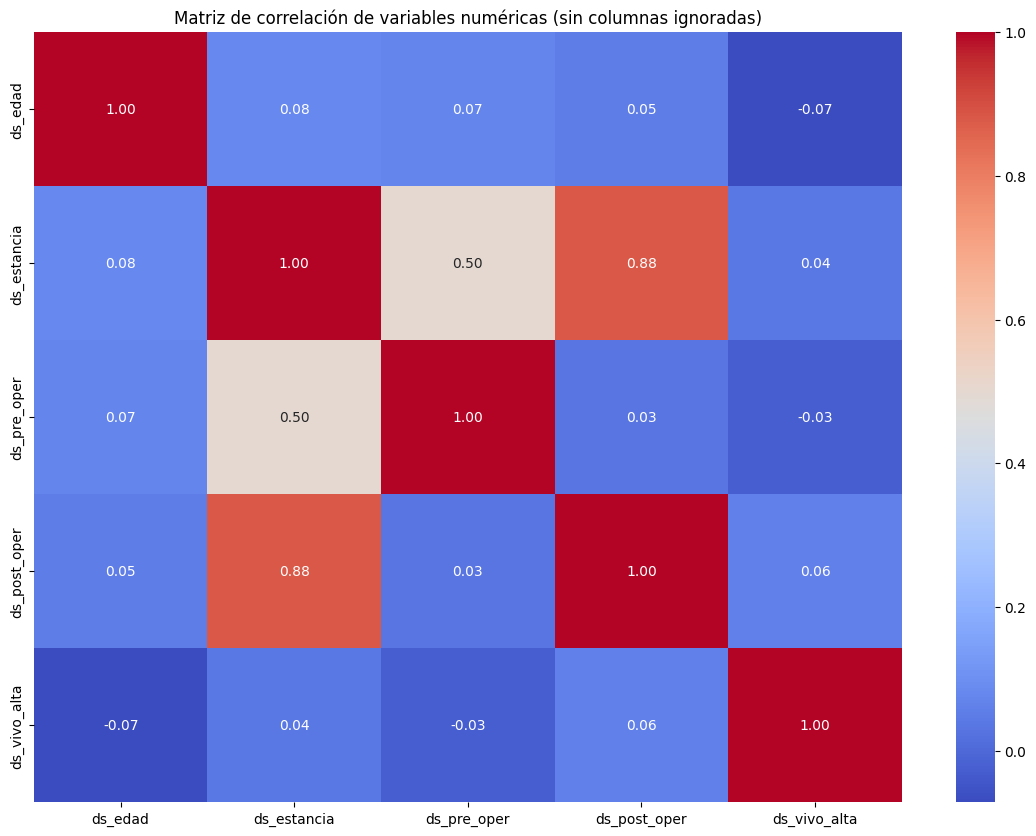

'\n# Visualización: Distribución de una variable numérica de interés (por ejemplo, \'ds_edad\')\nplt.figure(figsize=(8, 4))\nsns.histplot(df_analysis[\'ds_edad\'], kde=True, bins=20)\nplt.title("Distribución de ds_edad")\nplt.xlabel("ds_edad")\nplt.ylabel("Frecuencia")\nplt.show()\n\n# Análisis de la variable categórica \'gdiagalt\':\n# Se usa el DataFrame original (ya que \'gdiagalt\' se encuentra en df) para ver la distribución completa.\nif "gdiagalt" in df.columns:\n    plt.figure(figsize=(8, 4))\n    sns.countplot(data=df, x="gdiagalt", order=df[\'gdiagalt\'].value_counts().index)\n    plt.title("Distribución de la variable gdiagalt")\n    plt.xlabel("gdiagalt")\n    plt.ylabel("Frecuencia")\n    plt.xticks(rotation=45)\n    plt.show()\n'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset preprocesado
df = pd.read_csv('DATOS_PREPROCESADOS_2.csv')

# Eliminar filas que contengan "-999" o -999 en cualquier columna
df = df[~df.isin(["-999", -999]).any(axis=1)]

# Lista de variables categóricas que se desean tratar como tales
cat_features = [
    'gsitalta', 'itipsexo', 'itipingr', 'ireingre', 'iotrocen', 'gdiagalt',
    'ds_izq_der', 'ds_turno', 'ds_dia_semana_llegada', 'ds_mes_llegada',
    'ds_centro_afueras', 'ds_alergia_medicamentosa', 'movilidad', 'riesgo_caida', 'ds_alergia_alimenticia',
    'ds_otras_alergias', 'ds_ITU', 'ds_anemia',
    'ds_vitamina_d', 'ds_insuficiencia_respiratoria', 'ds_insuficiencia_cardiaca',
    'ds_deterioro_cognitivo', 'ds_insuficiencia_renal', 'ds_HTA', 'ds_diabetes', 'ds_comorbilidades'
]

# Convertir las variables listadas a tipo 'category'
for col in cat_features:
    if col in df.columns:
        df[col] = df[col].astype("category")

# --- Análisis Exploratorio de Datos (EDA) ---

# Definir las columnas a ignorar en el análisis
#cols_to_ignore = ["gsitalta", "ds_vivo_alta", "ds_estancia", "ds_post_oper", "ds_pre_oper"]
cols_to_ignore = []


# Crear un DataFrame para el análisis, eliminando las columnas a ignorar
df_analysis = df.drop(columns=cols_to_ignore)

# Información general del DataFrame (sin las columnas ignoradas)
print("Información del DataFrame (sin columnas ignoradas):")
df_analysis.info()

print("\nEstadísticas descriptivas:")
print(df_analysis.describe())

# Verificar la existencia de valores nulos en el DataFrame de análisis
print("\nValores nulos por columna:")
print(df_analysis.isnull().sum())

# Matriz de correlación para las variables numéricas del DataFrame de análisis
plt.figure(figsize=(14, 10))
correlation_matrix = df_analysis.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas (sin columnas ignoradas)")
plt.show()

# Selección de variables: mostramos la correlación entre variables numéricas (ordenadas según la primera columna)
#print("\nCorrelación entre variables numéricas (sin columnas ignoradas):")
#print(correlation_matrix.sort_values(by=correlation_matrix.columns[0], ascending=False))
"""
# Visualización: Distribución de una variable numérica de interés (por ejemplo, 'ds_edad')
plt.figure(figsize=(8, 4))
sns.histplot(df_analysis['ds_edad'], kde=True, bins=20)
plt.title("Distribución de ds_edad")
plt.xlabel("ds_edad")
plt.ylabel("Frecuencia")
plt.show()

# Análisis de la variable categórica 'gdiagalt':
# Se usa el DataFrame original (ya que 'gdiagalt' se encuentra en df) para ver la distribución completa.
if "gdiagalt" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x="gdiagalt", order=df['gdiagalt'].value_counts().index)
    plt.title("Distribución de la variable gdiagalt")
    plt.xlabel("gdiagalt")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()
"""


Matriz de correlaciones entre variables categóricas (Cramér's V):
                               itipsexo  gsitalta  iotrocen  gdiagalt  \
itipsexo                       0.997038  0.104387  0.061307  0.162218   
gsitalta                       0.104387  1.000000  0.044563  0.085022   
iotrocen                       0.061307  0.044563  0.963717  0.056057   
gdiagalt                       0.162218  0.085022  0.056057  1.000000   
ds_izq_der                     0.027680  0.053477  0.027185  1.000000   
ds_turno                       0.041092  0.051399  0.096744  0.073941   
ds_dia_semana_llegada          0.083614  0.072818  0.060159  0.084225   
ds_mes_llegada                 0.062107  0.142852  0.124592  0.115162   
ds_centro_afueras              0.021494  0.036524  0.000000  0.063804   
ds_alergia_medicamentosa       0.063984  0.095746  0.019258  0.104267   
ds_alergia_alimenticia         0.014253  0.048827  0.004276  0.058866   
ds_otras_alergias              0.014106  0.099760  0.00000

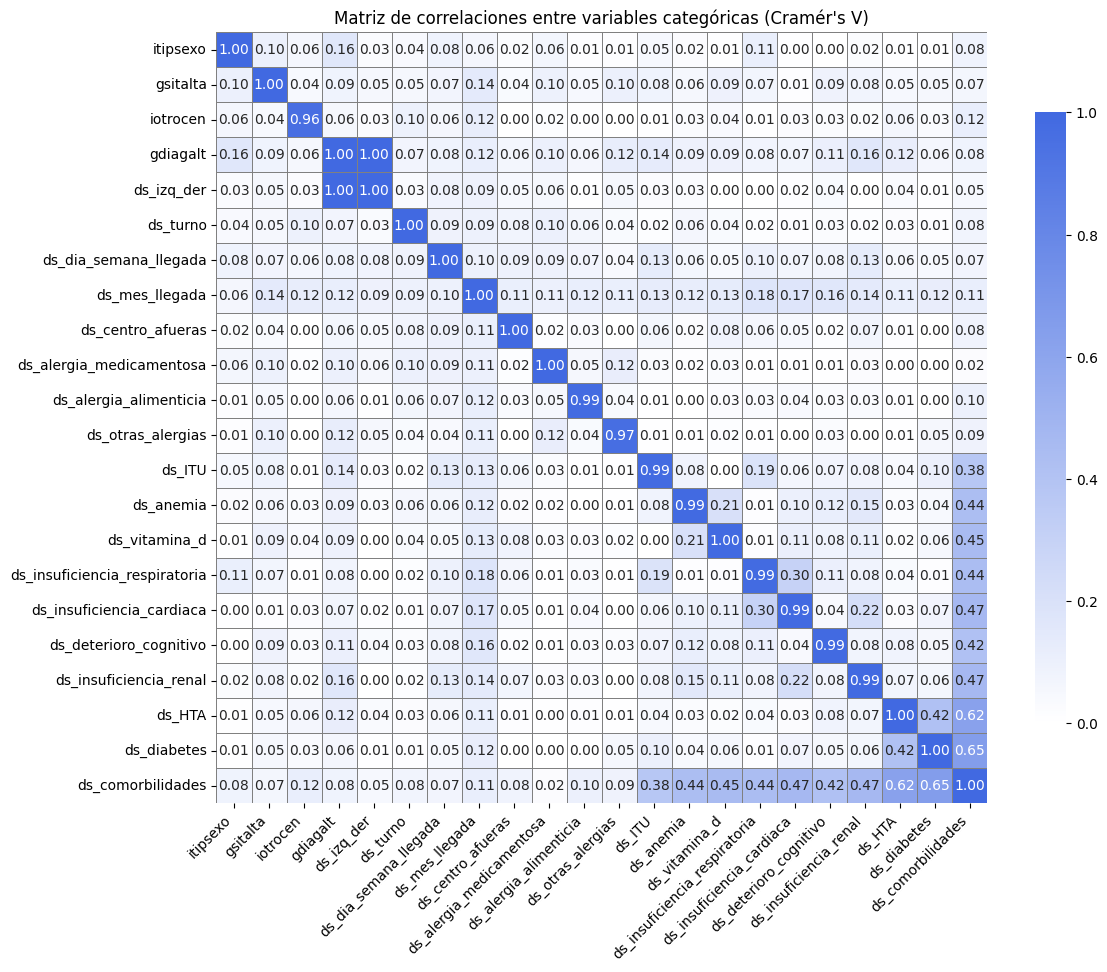

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Asegúrate de tener cargado tu DataFrame 'df', por ejemplo:
# df = pd.read_csv('DATOS_PREPROCESADOS_2.csv')

# Eliminamos la columna 'gidenpac' si existe en el DataFrame
if 'gidenpac' in df.columns:
    df = df.drop(columns=['gidenpac'])

# Función para calcular Cramér's V a partir de una tabla de contingencia
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Seleccionar las columnas categóricas (tipo 'object' o 'category')
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Crear una matriz para almacenar los valores de Cramér's V
cramers_v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

# Calcular Cramér's V para cada par de variables categóricas
for col1 in cat_cols:
    for col2 in cat_cols:
        confusion_matrix = pd.crosstab(df[col1], df[col2])
        cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

print("Matriz de correlaciones entre variables categóricas (Cramér's V):")
print(cramers_v_matrix)

# Crear un colormap personalizado que inicie en blanco para 0 y se intensifique hasta 'royalblue'
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["white", "royalblue"])

# Visualizar la matriz con un heatmap mejorado, mostrando 2 decimales en la anotación
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix.astype(float), annot=True, fmt=".2f", cmap=cmap, vmin=0, vmax=1,
            linewidths=0.5, linecolor='grey', square=True, cbar_kws={"shrink": .75})
plt.title("Matriz de correlaciones entre variables categóricas (Cramér's V)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


/tmp/ipykernel_9278/177213133.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['ds_pre_oper'].dropna() for _, group in df.groupby(col)]


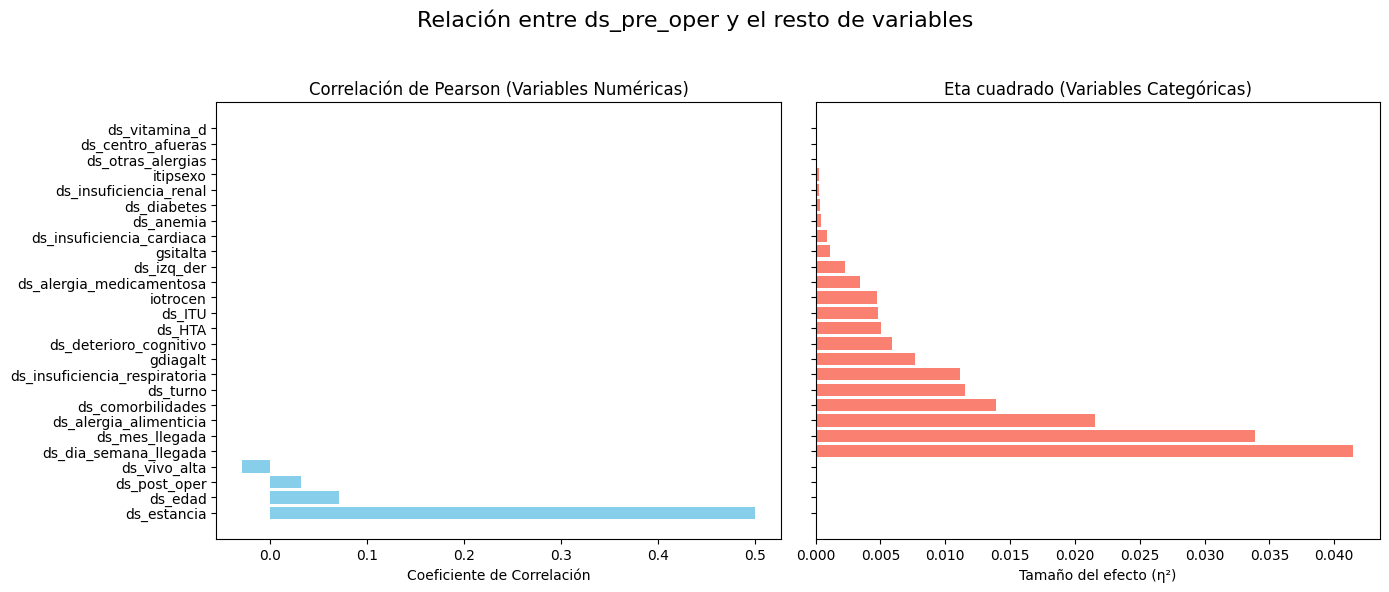

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Asegúrate de cargar el DataFrame, por ejemplo:
# df = pd.read_csv('DATOS_PREPROCESADOS_2.csv')

# Convertir ds_pre_oper a numérico (en caso de que no lo sea)
df['ds_pre_oper'] = pd.to_numeric(df['ds_pre_oper'], errors='coerce')

# Separamos las variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'ds_pre_oper' in num_cols:
    num_cols.remove('ds_pre_oper')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular la correlación de Pearson para las variables numéricas
num_corr = {}
for col in num_cols:
    if not df[col].dropna().empty:
        corr, p_value = ss.pearsonr(df[col].dropna(), df['ds_pre_oper'].dropna())
        num_corr[col] = corr

# Calcular el tamaño del efecto (eta cuadrado) para las variables categóricas
# eta² = (F * df_between) / (F * df_between + df_within)
cat_effect = {}
for col in cat_cols:
    groups = [group['ds_pre_oper'].dropna() for _, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = ss.f_oneway(*groups)
        k = len(groups)
        df_between = k - 1
        df_within = df['ds_pre_oper'].dropna().shape[0] - k
        eta_sq = (f_stat * df_between) / (f_stat * df_between + df_within)
        cat_effect[col] = eta_sq
    else:
        cat_effect[col] = np.nan

# Convertir resultados a DataFrames para facilitar el plot
num_df = pd.DataFrame(list(num_corr.items()), columns=['Variable', 'Measure'])
num_df['Tipo'] = 'Numérica'

cat_df = pd.DataFrame(list(cat_effect.items()), columns=['Variable', 'Measure'])
cat_df['Tipo'] = 'Categórica'

# Ordenar cada DataFrame por la magnitud de la medida
num_df = num_df.sort_values(by='Measure', key=lambda x: abs(x), ascending=False)
cat_df = cat_df.sort_values(by='Measure', ascending=False)

# Crear el gráfico resumen con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Panel para variables numéricas (Pearson)
axes[0].barh(num_df['Variable'], num_df['Measure'], color='skyblue')
axes[0].set_title("Correlación de Pearson (Variables Numéricas)")
axes[0].set_xlabel("Coeficiente de Correlación")
axes[0].invert_yaxis()  # Para que la variable con mayor correlación aparezca arriba

# Panel para variables categóricas (Eta cuadrado)
axes[1].barh(cat_df['Variable'], cat_df['Measure'], color='salmon')
axes[1].set_title("Eta cuadrado (Variables Categóricas)")
axes[1].set_xlabel("Tamaño del efecto (η²)")
axes[1].invert_yaxis()

plt.suptitle("Relación entre ds_pre_oper y el resto de variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipykernel_9278/2066945637.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['gsitalta'].dropna() for _, group in df.groupby(col)]


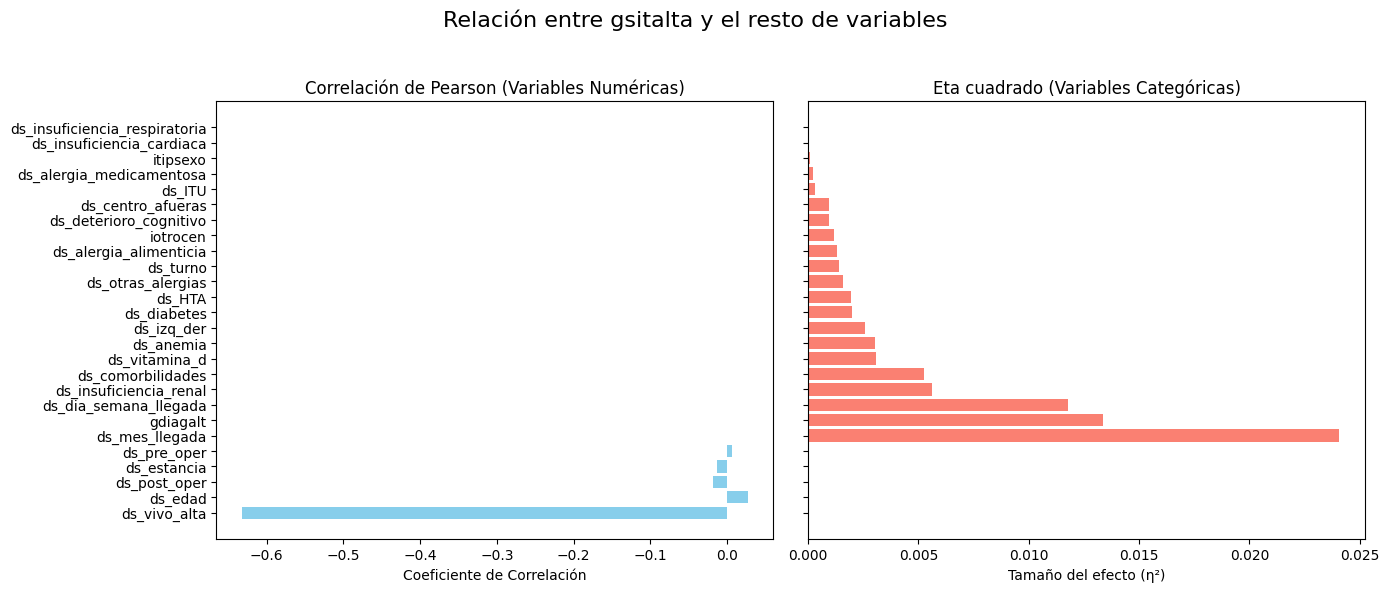

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# Asegúrate de cargar el DataFrame, por ejemplo:
# df = pd.read_csv('DATOS_PREPROCESADOS_2.csv')

# Convertir gsitalta a numérico (en caso de que no lo sea)
df['gsitalta'] = pd.to_numeric(df['gsitalta'], errors='coerce')

# Separamos las variables numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'gsitalta' in num_cols:
    num_cols.remove('gsitalta')

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calcular la correlación de Pearson para las variables numéricas
num_corr = {}
for col in num_cols:
    if not df[col].dropna().empty:
        corr, p_value = ss.pearsonr(df[col].dropna(), df['gsitalta'].dropna())
        num_corr[col] = corr

# Calcular el tamaño del efecto (eta cuadrado) para las variables categóricas
# eta² = (F * df_between) / (F * df_between + df_within)
cat_effect = {}
for col in cat_cols:
    groups = [group['gsitalta'].dropna() for _, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = ss.f_oneway(*groups)
        k = len(groups)
        df_between = k - 1
        df_within = df['gsitalta'].dropna().shape[0] - k
        eta_sq = (f_stat * df_between) / (f_stat * df_between + df_within)
        cat_effect[col] = eta_sq
    else:
        cat_effect[col] = np.nan

# Convertir resultados a DataFrames para facilitar el plot
num_df = pd.DataFrame(list(num_corr.items()), columns=['Variable', 'Measure'])
num_df['Tipo'] = 'Numérica'

cat_df = pd.DataFrame(list(cat_effect.items()), columns=['Variable', 'Measure'])
cat_df['Tipo'] = 'Categórica'

# Ordenar cada DataFrame por la magnitud de la medida
num_df = num_df.sort_values(by='Measure', key=lambda x: abs(x), ascending=False)
cat_df = cat_df.sort_values(by='Measure', ascending=False)

# Crear el gráfico resumen con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Panel para variables numéricas (Pearson)
axes[0].barh(num_df['Variable'], num_df['Measure'], color='skyblue')
axes[0].set_title("Correlación de Pearson (Variables Numéricas)")
axes[0].set_xlabel("Coeficiente de Correlación")
axes[0].invert_yaxis()  # Para que la variable con mayor correlación aparezca arriba

# Panel para variables categóricas (Eta cuadrado)
axes[1].barh(cat_df['Variable'], cat_df['Measure'], color='salmon')
axes[1].set_title("Eta cuadrado (Variables Categóricas)")
axes[1].set_xlabel("Tamaño del efecto (η²)")
axes[1].invert_yaxis()

plt.suptitle("Relación entre gsitalta y el resto de variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
